<a href="https://colab.research.google.com/github/CelesTech03/Data-Analytics-Winter-2022/blob/main/Python/Week%203/Day_3_KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Classified%20Data')

In [3]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scalar = StandardScaler()

In [9]:
# I am training my scalar variable to learn about the original dataset without the target class
scalar.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler()

In [10]:
scalar

StandardScaler()

In [11]:
scaled_features = scalar.transform(df.drop('TARGET CLASS', axis = 1))

In [12]:
df_feature = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [13]:
df_feature

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size = 0.3)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
predict = knn.predict(X_test)

In [19]:
predict

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [20]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(confusion_matrix(y_test, predict))

[[139  14]
 [ 10 137]]


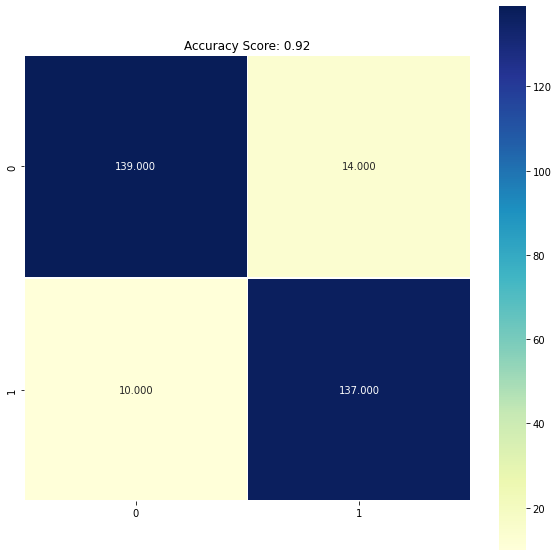

In [23]:
plt.figure(figsize = (10, 10))
sns.heatmap(confusion_matrix(y_test, predict), annot = True, fmt = '.3f', linewidths= .5, square = True, cmap = 'YlGnBu')
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accuracy Score: {knn.score(X_test, y_test)}'
plt.title(all_sample_title, size = 12);

In [24]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       153
           1       0.91      0.93      0.92       147

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# Repeat for k = 5

In [25]:
knn5 = KNeighborsClassifier(n_neighbors = 5)

In [26]:
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
predict2 = knn5.predict(X_test)

In [28]:
print(confusion_matrix(y_test, predict2))

[[140  13]
 [  7 140]]


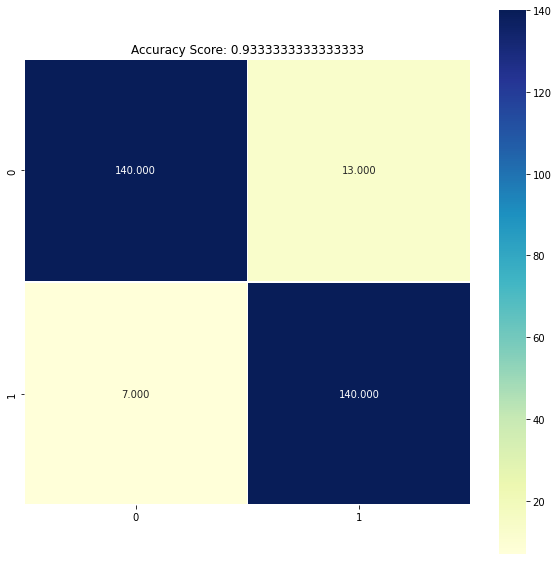

In [29]:
plt.figure(figsize = (10, 10))
sns.heatmap(confusion_matrix(y_test, predict2), annot = True, fmt = '.3f', linewidths= .5, square = True, cmap = 'YlGnBu')
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accuracy Score: {knn5.score(X_test, y_test)}'
plt.title(all_sample_title, size = 12);

In [30]:
print(classification_report(y_test, predict2))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       153
           1       0.92      0.95      0.93       147

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# K Value and accuracy

In [31]:
from sklearn import metrics

In [32]:
score = []

In [33]:
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test,y_pred))

print(score)

[0.92, 0.91, 0.95, 0.95, 0.9333333333333333, 0.95, 0.9433333333333334, 0.9433333333333334, 0.9466666666666667, 0.9466666666666667, 0.9366666666666666, 0.94, 0.9366666666666666, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.94, 0.94, 0.94, 0.9366666666666666, 0.94, 0.94, 0.9433333333333334, 0.9433333333333334, 0.9433333333333334, 0.9433333333333334, 0.9433333333333334, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9433333333333334, 0.9433333333333334, 0.9433333333333334, 0.95, 0.9433333333333334, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9433333333333334]


TypeError: ignored

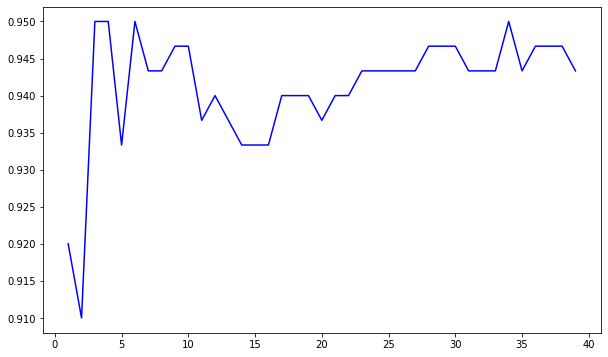

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),score, color = 'blue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [36]:
error_rate = []
# Might take some time
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

TypeError: ignored

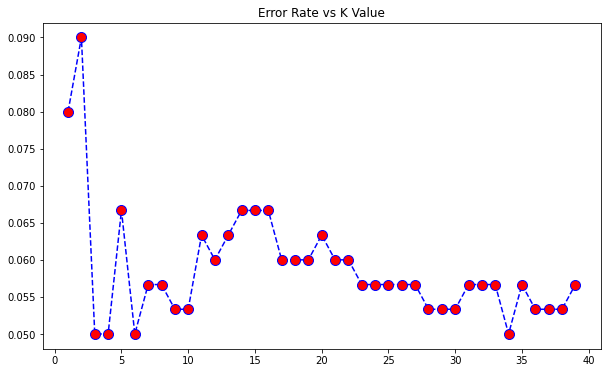

In [37]:
# Plotting accuracy vs. Error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color='blue', linestyle='dashed', marker = 'o',
         markerfacecolor='red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')